https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed 를 참고했음.

# Visualization with Wine Reviews


In [1]:
import sklearn
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine_reviews = pd.read_csv('winemag-data-130k-v2.csv', index_col=0) #열의 위치로 index 정해줌
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Histogram


#### 1) Matplotlib



Text(0, 0.5, 'Frequency')

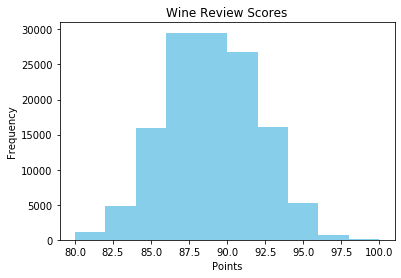

In [3]:
fig, ax = plt.subplots() #figure와 axis
ax.hist(wine_reviews['points'], color='skyblue')
ax.set_title('Wine Review Scores')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

#### 2) Pandas


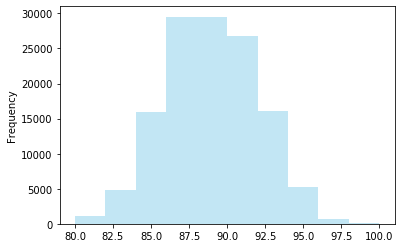

In [4]:
wine_reviews['points'].plot.hist(color='skyblue', alpha=0.5) #alpha 투명도 조절

#### 3) Seaborn

Text(0.5, 1.0, 'Wine Review Scores')

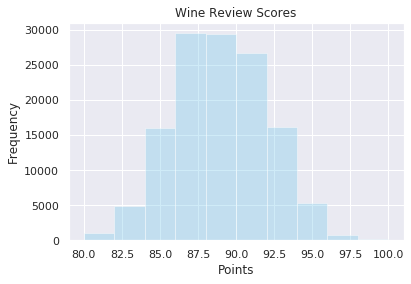

In [5]:
sns.set(style='darkgrid')
sns.distplot(wine_reviews['points'], bins=10, kde=False, color='skyblue') #kde=False : 밀도함수 그리지 않는다
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('Wine Review Scores')

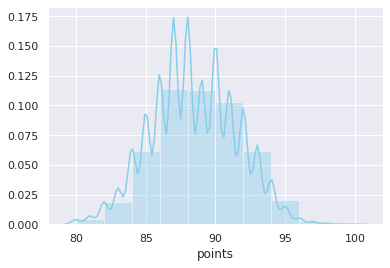

In [6]:
sns.distplot(wine_reviews['points'], bins=10, color='skyblue') #디폴트; kde=True

## Barplot


#### 1) Matplotlib

Text(0, 0.5, 'Frequency')

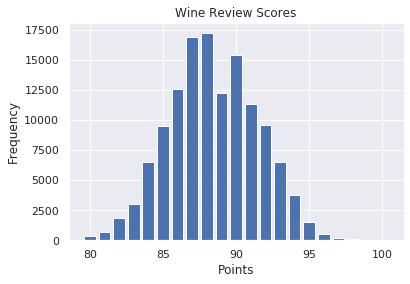

In [7]:
fig, ax = plt.subplots() 
data = wine_reviews['points'].value_counts() 
points = data.index 
frequency = data.values 
ax.bar(points, frequency) 
ax.set_title('Wine Review Scores') 
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')

#### 2) Pandas

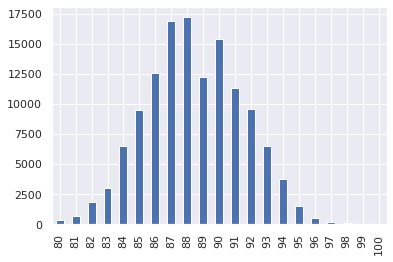

In [8]:
wine_reviews['points'].value_counts().sort_index().plot.bar()

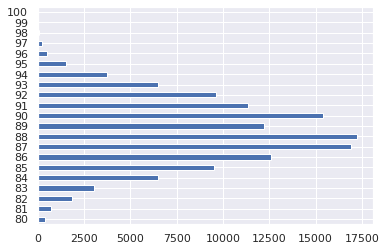

In [9]:
wine_reviews['points'].value_counts().sort_index().plot.barh() #plot.barch 이용하면 눞여짐

#### 3) Seaborn

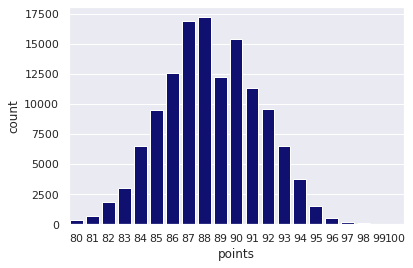

In [13]:
sns.countplot(wine_reviews['points'], color='navy')

## Boxplot


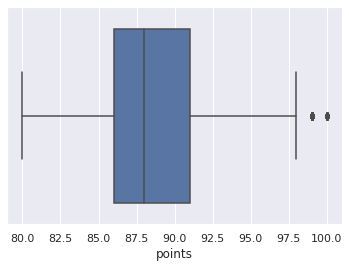

In [14]:
sns.boxplot(wine_reviews['points'])

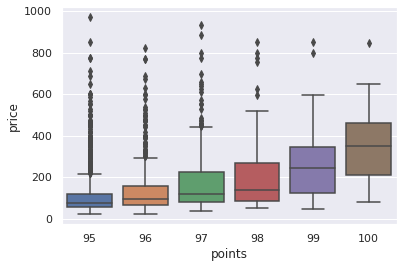

In [15]:
df = wine_reviews[(wine_reviews['points']>=95) & (wine_reviews['price']<1000)]
sns.boxplot('points', 'price', data=df)